<a href="https://colab.research.google.com/github/blarpblarp/CIS-2100-Project-2/blob/main/CIS_2100_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Vincent Le
2.   CIS 2100
3.   Project 2

1. Importing Modules
    - Adding libraries to start the project

In [ ]:
import csv
import random
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Product Class
    - Provides product with a name and price along with an identifier

In [ ]:
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        self.product_id = random.randint(1000, 9999)

3. Order Class
    - Provides the order with a unique ID associated with a certain customer with time/sorting attributes

In [ ]:
class Order:
    def __init__(self, customer, products=None):
        self.order_id = random.randint(10000, 99999)
        self.customer = customer
        self.products = products or []
        self.order_date = datetime.now()
        self.total_price = sum(product.price for product in self.products)

    def add_product(self, product):
        self.products.append(product)
        self.total_price += product.price

4. Customer Class
    - Provides customer with a name + unique ID and the list of orders the customer placed

In [ ]:
class Customer:
    def __init__(self, name, customer_id=None):
        self.name = name
        self.customer_id = customer_id or random.randint(100000, 999999)
        self.orders = []

    def create_order(self, products=None):
        order = Order(self, products)
        self.orders.append(order)
        return order

5. Store Class
    - Represent the store with an ID + Location + Customers and a list of all their orders

In [ ]:
class Store:
    def __init__(self, store_id, location):
        self.store_id = store_id
        self.location = location
        self.customers = []
        self.orders = []

    def add_customer(self, customer):
        if customer not in self.customers:
            self.customers.append(customer)

    def record_order(self, order):
        self.orders.append(order)
        if order.customer not in self.customers:
            self.add_customer(order.customer)

6. Corporation Class
    - Provides corporation's name and list of stores managed by the corporation.

In [ ]:
class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []
        self.sales_data = []

    def add_store(self, store):
        self.stores.append(store)

    def generate_annual_sales_simulation(self, num_stores=5, num_customers=100, num_products=20):
        products = [Product(f"Product_{i}", round(random.uniform(10, 500), 2)) for i in range(num_products)]
        customers = [Customer(f"Customer_{i}") for i in range(num_customers)]

        for i in range(num_stores):
            store = Store(f"Store_{i+1}", f"Location_{i+1}")
            self.add_store(store)

            for _ in range(365):
                num_orders = random.randint(5, 30)
                for _ in range(num_orders):
                    customer = random.choice(customers)
                    order_products = random.sample(products, random.randint(1, 5))
                    order = customer.create_order(order_products)
                    store.record_order(order)

                    for product in order_products:
                        self.sales_data.append({
                            'Date': order.order_date.strftime('%Y-%m-%d'),
                            'Time': order.order_date.strftime('%H:%M:%S'),
                            'StoreID': store.store_id,
                            'CustomerID': customer.customer_id,
                            'OrderID': order.order_id,
                            'ProductName': product.name,
                            'ProductPrice': product.price
                        })

    def export_sales_data(self, filename='annual_sales_data.csv'):
        if not self.sales_data:
            print("No sales data to export. Run generate_annual_sales_simulation() first.")
            return

        keys = ['Date', 'Time', 'StoreID', 'CustomerID', 'OrderID', 'ProductName', 'ProductPrice']
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=keys)
            writer.writeheader()
            writer.writerows(self.sales_data)
        print(f"Sales data exported to {filename}")

    def analyze_and_visualize_sales(self, filename='annual_sales_data.csv'):
        # Read the sales data
        sales_data = pd.read_csv(filename)
        display(sales_data.head())

        # Analysis 1: Most prevalent products in customer baskets
        most_prevalent_products = sales_data['ProductName'].value_counts().head(10)
        print("Most prevalent products in customer baskets:")
        display(most_prevalent_products)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=most_prevalent_products.values, y=most_prevalent_products.index, palette='viridis')
        plt.title("Top 10 Most Prevalent Products")
        plt.xlabel("Frequency")
        plt.ylabel("Product Name")
        plt.show()

        # Analysis 2: Frequency of large buyers
        customer_order_counts = sales_data.groupby('CustomerID')['OrderID'].nunique()
        large_buyers = customer_order_counts[customer_order_counts >= 10]
        print(f"Number of large buyers (>= 10 orders): {len(large_buyers)}")
        display(large_buyers)

        plt.figure(figsize=(10, 6))
        sns.histplot(large_buyers, bins=15, kde=True, color='blue')
        plt.title("Frequency of Large Buyers")
        plt.xlabel("Number of Orders")
        plt.ylabel("Count of Customers")
        plt.show()

        # Analysis 3: Stores with large-basket buyers
        store_large_buyers = sales_data[sales_data['CustomerID'].isin(large_buyers.index)]
        store_large_basket_counts = store_large_buyers['StoreID'].value_counts()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=store_large_basket_counts.index, y=store_large_basket_counts.values, palette='coolwarm')
        plt.title("Stores with Most Large-Basket Buyers")
        plt.xlabel("Store ID")
        plt.ylabel("Frequency of Large-Basket Buyers")
        plt.show()

        # Analysis 4: Top-n products for large buyers
        top_n_products_large_buyers = store_large_buyers['ProductName'].value_counts().head(10)
        print("Top 10 Products for Large-Basket Buyers:")
        display(top_n_products_large_buyers)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_n_products_large_buyers.values, y=top_n_products_large_buyers.index, palette='magma')
        plt.title("Top 10 Products for Large Buyers")
        plt.xlabel("Frequency")
        plt.ylabel("Product Name")
        plt.show()

        # Analysis 5: Categorical makeup of large buyers' baskets
        category_avg_prices = store_large_buyers.groupby('ProductName')['ProductPrice'].mean().sort_values(ascending=False)
        print("Categorical Makeup (Average Price per Product):")
        display(category_avg_prices.head(10))

        plt.figure(figsize=(10, 6))
        sns.barplot(x=category_avg_prices.head(10).values, y=category_avg_prices.head(10).index, palette='rocket')
        plt.title("Categorical Makeup of Large Buyers' Baskets")
        plt.xlabel("Average Price")
        plt.ylabel("Product Name")
        plt.show()

7. Main Function

Sales data exported to annual_sales_data.csv


,Date,Time,StoreID,CustomerID,OrderID,ProductName,ProductPrice
0,2024-12-11,00:18:17,Store_1,228335,48279,Product_19,426.77
1,2024-12-11,00:18:17,Store_1,694027,52708,Product_0,185.54
2,2024-12-11,00:18:17,Store_1,694027,52708,Product_6,46.91
3,2024-12-11,00:18:17,Store_1,694027,52708,Product_4,459.21
4,2024-12-11,00:18:17,Store_1,694027,52708,Product_16,23.31


Most prevalent products in customer baskets:


,count
ProductName,
Product_5,4914
Product_10,4905
Product_4,4855
Product_6,4849
Product_1,4839
Product_15,4827
Product_16,4810
Product_8,4796
Product_7,4789


<ipython-input-16-6fe868eb0566>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_prevalent_products.values, y=most_prevalent_products.index, palette='viridis')


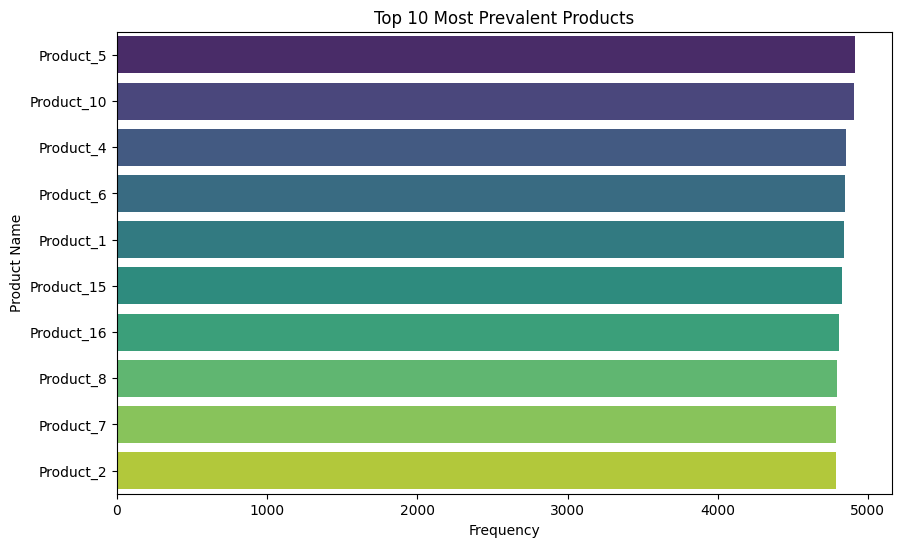

Number of large buyers (>= 10 orders): 100


,OrderID
CustomerID,
103579,313
118011,300
118305,329
127913,342
132231,305
...,...
915329,292
935489,318
942593,284


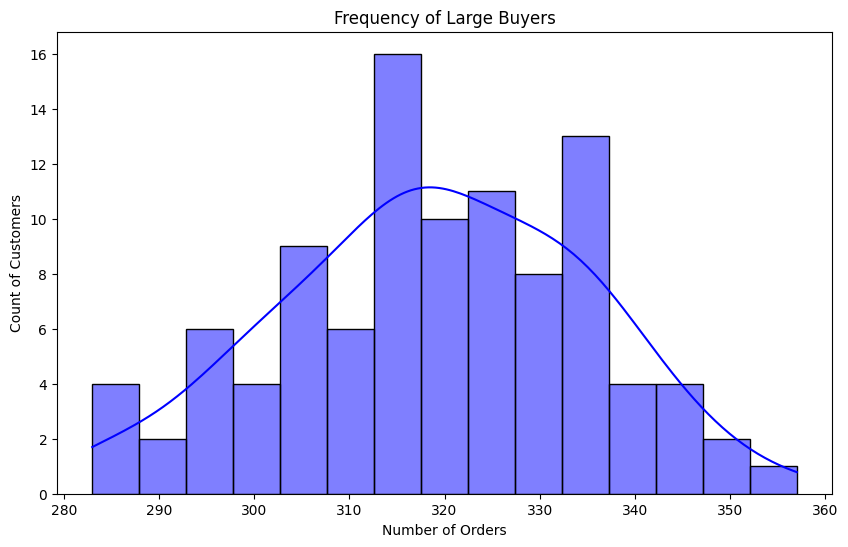

<ipython-input-16-6fe868eb0566>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_large_basket_counts.index, y=store_large_basket_counts.values, palette='coolwarm')


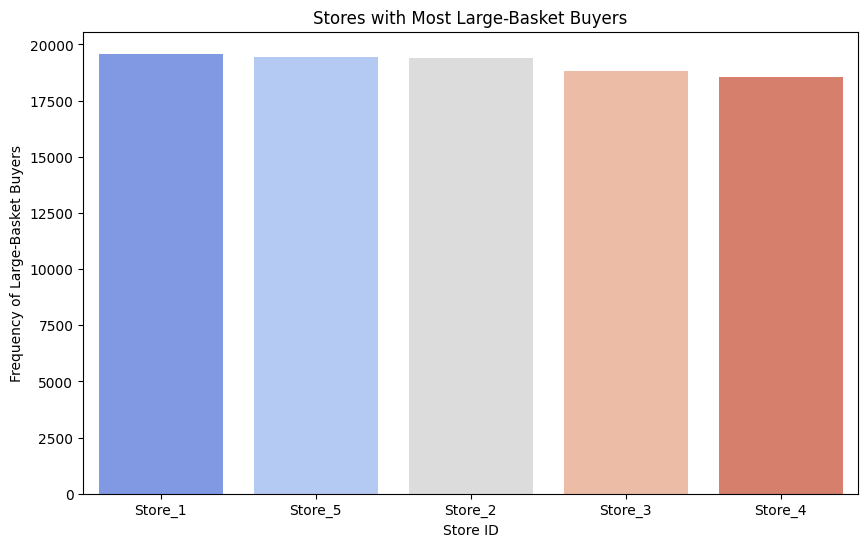

Top 10 Products for Large-Basket Buyers:


,count
ProductName,
Product_5,4914
Product_10,4905
Product_4,4855
Product_6,4849
Product_1,4839
Product_15,4827
Product_16,4810
Product_8,4796
Product_7,4789


<ipython-input-16-6fe868eb0566>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_products_large_buyers.values, y=top_n_products_large_buyers.index, palette='magma')


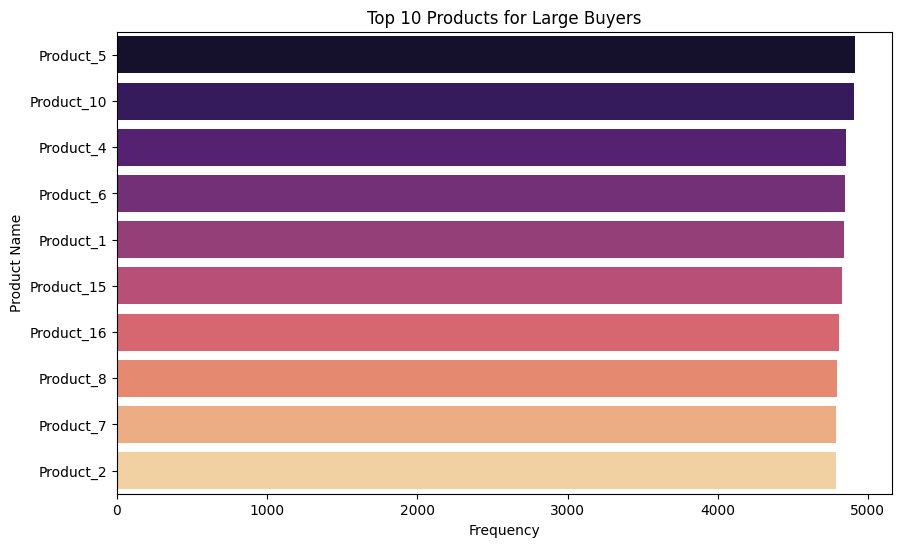

Categorical Makeup (Average Price per Product):


,ProductPrice
ProductName,
Product_17,470.58
Product_1,464.53
Product_15,461.94
Product_4,459.21
Product_18,448.28
Product_19,426.77
Product_11,323.16
Product_5,315.35
Product_10,237.06


<ipython-input-16-6fe868eb0566>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_prices.head(10).values, y=category_avg_prices.head(10).index, palette='rocket')


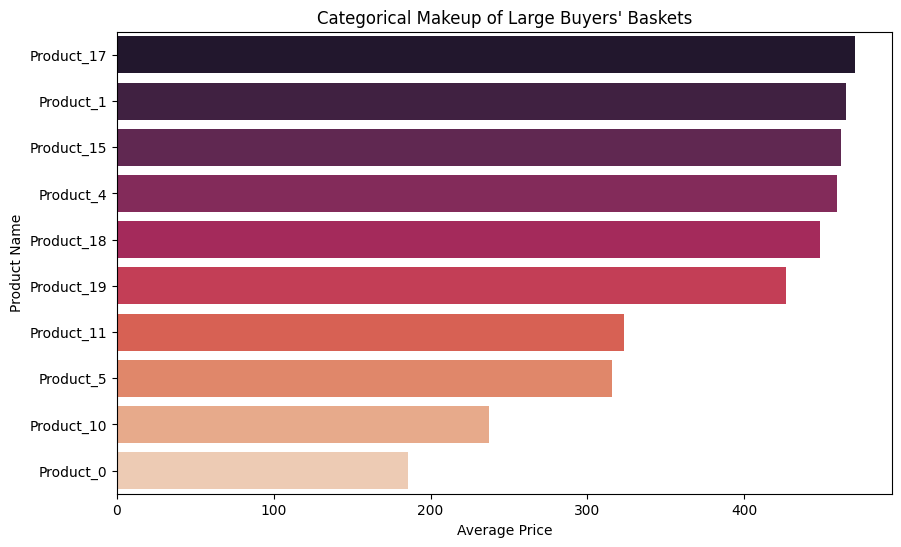

In [ ]:
def main():
    # Initialize corporation and simulate data
    corp = Corporation("Digital Twin Corp")
    corp.generate_annual_sales_simulation()
    csv_filename = 'annual_sales_data.csv'
    corp.export_sales_data(csv_filename)
    corp.analyze_and_visualize_sales(csv_filename)

if __name__ == "__main__":
    main()
